# Ml model to detect AI generated text

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential

from keras.layers import*
import tensorflow_hub as hub


In [3]:
data1=pd.read_csv("D:/kaggle/train_essays.csv")
data1.info()
data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


Text(0.5, 1.0, 'Generated Text')

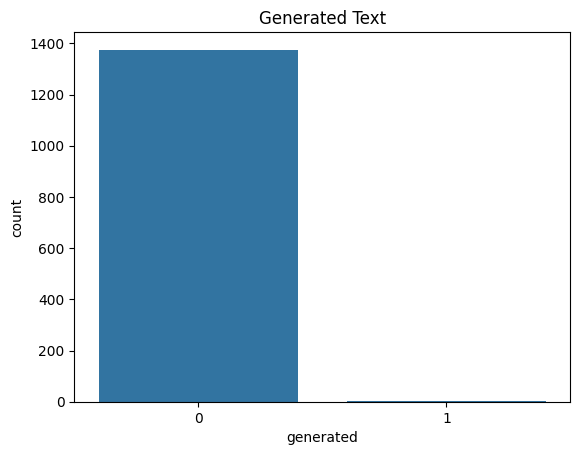

In [4]:
dist=sns.countplot(data=data1,x="generated")
dist.set_title("Generated Text")

In [5]:
#Due to insufficient data, we are using external data file
#
df=pd.read_csv("D:/kaggle/train_drcat_03.csv")
#df.info
print(df.isnull)


<bound method DataFrame.isnull of                  essay_id                                               text  \
0            6BB4BEB51A80  People can learn without making mistakes. Peop...   
1            30A8FB981469  PHONES AND DRIVING\n\nIn this world in which w...   
2            B403A4E28BCE  Okay, here's my essay:\n\nMaking Your Own Deci...   
3            B8F0ECC9DC86   Dear : Principal\n\nI believe that allowing s...   
4            159424F57C24  Well for one if you seek more then one person ...   
...                   ...                                                ...   
42201        F7341069C4A4  "Oh man I didn't make the soccer team!", yelle...   
42202        AFE6E553DAC2  I believe that using this technology could be ...   
42203  falcon_180b_v1_600  The Face on Mars is a fascinating phenomenon t...   
42204        A5F84C104693  Texting & Driving\n\nUsing your phone while dr...   
42205        A148C659E98B  Dear Principal,\n\nI have been really good thi...   

     

label
0    29792
1    12414
Name: count, dtype: int64

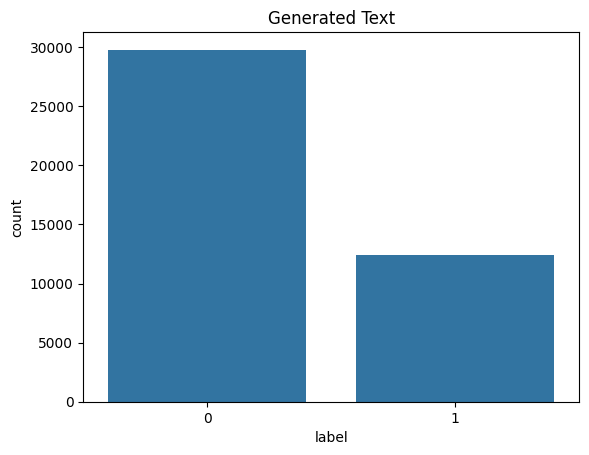

In [6]:
sns.countplot(data=df, x="label").set_title("Generated Text")

df.label.value_counts()

label
0    12414
1    12414
Name: count, dtype: int64


Text(0.5, 1.0, 'Generated')

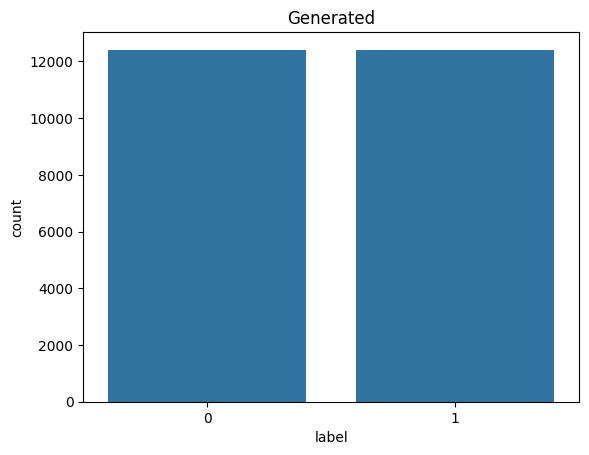

In [7]:
# Converting imbalance data to balance data using Down sampling
df_hum=df[df['label']==0]
df_ai=df[df['label']==1]
df_hum_downsampled=df_hum.sample(df_ai.shape[0])
df_balanced=pd.concat([df_hum_downsampled,df_ai])
print(df_balanced.label.value_counts())
sns.countplot(data=df_balanced,x='label').set_title("Generated")

Text(0.5, 1.0, 'Generated')

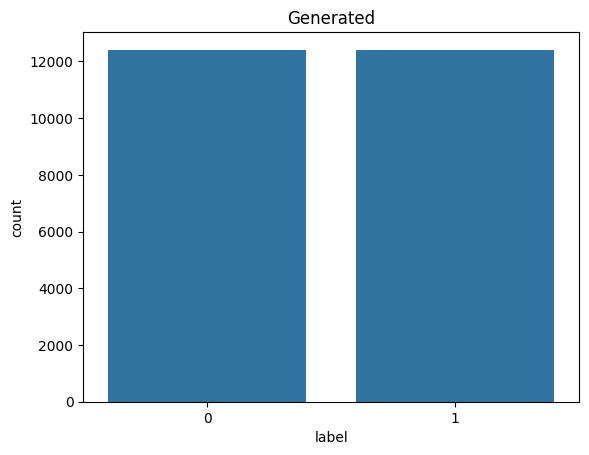

In [8]:
df_balanced.drop(['essay_id','fold'],axis=1,inplace=True)
final_data=df_balanced.fillna("None")
sns.countplot(data=final_data,x='label').set_title("Generated")

In [15]:
final_data

,text,label,source,prompt
25377,"All around the world, cars have influence our ...",0,persuade_corpus,None
8146,When asking for advice on any topic don't just...,0,persuade_corpus,None
7087,The argument of keeping The Electoral College ...,0,persuade_corpus,None
6366,Texting and driving has become a huge problem ...,0,persuade_corpus,None
32289,In the year 2000 there was a presidential elec...,0,train_essays,None
...,...,...,...,...
42190,I think our principal's idea of making us do e...,1,llama_70b_v1,Your principal has decided that all students m...
42191,I think it's a good idea for schools to have o...,1,falcon_180b_v1,Some schools have implemented policies that al...
42196,Students often debate whether inactivity or s...,1,mistral7binstruct_v2,\nTask: Research the benefits of staying occup...
42199,Advantages of Limiting Car Usage\n\nLimiting c...,1,radek_500,None


In [ ]:
#It takes hours to preprocess the entire data. So I'm trimming it to 100
df=final_data
df_zeroes = df[df['label'] == 0]
df_ones = df[df['label'] == 1]

# Sample 100 rows from each DataFrame
df_zeroes_sampled = df_zeroes.sample(n=100, random_state=42)
df_ones_sampled = df_ones.sample(n=100, random_state=42)
df_sampled = pd.concat([df_zeroes_sampled, df_ones_sampled])

In [10]:
#features=final_data.drop('label',axis=1)
#labels=final_data['label']
features=df_sampled.drop('label',axis=1)
labels=df_sampled['label']
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [11]:
import tensorflow_text as text
import tensorflow_hub as hub
bert_preprocess = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
bert_encoder = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/3",
    trainable=True)


In [12]:
import numpy as np
x_train_text = x_train[['prompt','text','source']].values.tolist()
x_test_text = x_test[['prompt','text','source']].values.tolist()

# Convert the input data to NumPy arrays
x_train_text = np.array(x_train_text)
y_train = np.array(y_train)


# Bert layer. preprocess-->encodes
text_input = tf.keras.layers.Input(shape=(3,), dtype=tf.string, name='text')  # Adjusting the shape to match the number of text columns
preprocessed_text = bert_preprocess(text_input[:, 0])  
outputs = bert_encoder(preprocessed_text)

# Neural layer
dropout_output = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
op = tf.keras.layers.Dense(1, activation=None, name="output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model1 = tf.keras.Model(inputs=[text_input], outputs=[op])

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)


In [14]:
# Setting epoch as 5, due to  high time consuming trianing process
model1.fit(
    x_train_text,
    y_train,
    epochs=5,
    shuffle=True,
    verbose=2,
    
)

Epoch 1/5
4/4 - 389s - loss: 7.6246 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - 389s/epoch - 97s/step
Epoch 2/5
4/4 - 348s - loss: 7.7721 - accuracy: 0.4750 - precision: 0.4870 - recall: 0.9333 - 348s/epoch - 87s/step
Epoch 3/5
4/4 - 383s - loss: 6.6587 - accuracy: 0.5500 - precision: 0.5375 - recall: 0.7167 - 383s/epoch - 96s/step
Epoch 4/5
4/4 - 343s - loss: 7.5552 - accuracy: 0.4583 - precision: 0.4138 - recall: 0.2000 - 343s/epoch - 86s/step
Epoch 5/5
4/4 - 406s - loss: 7.7125 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - 406s/epoch - 102s/step


In [19]:
model1.evaluate(x_val, y_val)

2/2 [==============================] - 9s 2s/step - loss: 6.1700 - accuracy: 0.6000 - precision: 0.0000e+00 - recall: 0.0000e+00


[6.169979572296143, 0.6000000238418579, 0.0, 0.0]

In [22]:
df=final_data
df_zeroes = df[df['label'] == 0]
df_ones = df[df['label'] == 1]

# Sample 5 rows from each DataFrame
df_zeroes_sampled = df_zeroes.sample(n=10, random_state=42)
df_ones_sampled = df_ones.sample(n=10, random_state=42)

# Concatenate the two DataFrames
df_sampled = pd.concat([df_zeroes_sampled, df_ones_sampled])
df_sampled
l1=df_sampled['label']
f1=df_sampled.drop('label',axis=1)

2/2 [==============================] - 8s 2s/step


Text(50.722222222222214, 0.5, 'Truth')

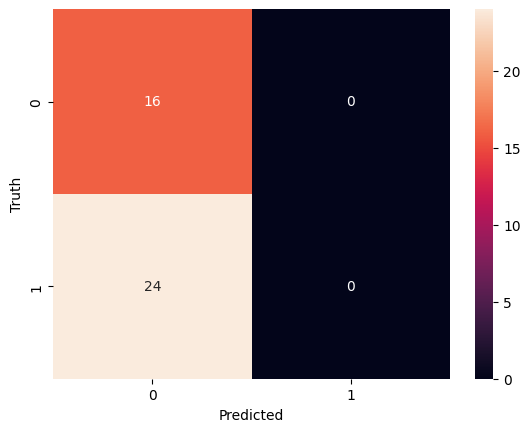

In [22]:

y_predicted=model1.predict(x_test)
y_predicted = y_predicted.flatten()
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model1.save("D:/kaggle/AI_detect_model.h5")